In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder

# Create a dataframe with the collected data using pandas

In [2]:
data = pd.read_csv('/kaggle/input/cigarette-687/Survey for choosing a new cigarette brand.csv')

print(data)

                        Timestamp                          Username  \
0    2024/02/24 12:02:55 PM GMT+6  mumtahena.hussain@northsouth.edu   
1    2024/02/24 12:04:33 PM GMT+6        mahjabeenrasha13@gmail.com   
2    2024/02/24 12:06:39 PM GMT+6      umamah.banath@northsouth.edu   
3    2024/02/24 12:11:09 PM GMT+6       mahirul.alam@northsouth.edu   
4    2024/02/24 12:14:32 PM GMT+6                               NaN   
..                            ...                               ...   
682   2024/05/11 1:25:25 PM GMT+6                               NaN   
683   2024/05/11 1:27:39 PM GMT+6                               NaN   
684   2024/05/11 2:09:24 PM GMT+6                               NaN   
685  2024/05/12 12:07:06 PM GMT+6                               NaN   
686   2024/05/12 1:39:11 PM GMT+6                               NaN   

    Do you smoke? What is your age? What is your gender?  \
0              No               NaN                  NaN   
1              No          

In [3]:
data

,Timestamp,Username,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
0,2024/02/24 12:02:55 PM GMT+6,mumtahena.hussain@northsouth.edu,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024/02/24 12:04:33 PM GMT+6,mahjabeenrasha13@gmail.com,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/02/24 12:06:39 PM GMT+6,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,NaN,NaN,NaN,1 to 5,NaN,NaN,NaN,NaN,NaN,Because of Taste;Because of Good packaging;Bec...,NaN,9 to 12,Reduced price range
3,2024/02/24 12:11:09 PM GMT+6,mahirul.alam@northsouth.edu,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/02/24 12:14:32 PM GMT+6,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2024/05/11 1:25:25 PM GMT+6,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,2024/05/11 1:27:39 PM GMT+6,NaN,Yes,18-24,Female,NaN,NaN,NaN,Under 20000,Over 20,Because of Availability,Because of Taste,NaN,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Reduced price range;Better taste;Less harmful ...
684,2024/05/11 2:09:24 PM GMT+6,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,2024/05/12 12:07:06 PM GMT+6,NaN,Yes,18-24,Male,Under 20000,NaN,NaN,NaN,11 to 15,NaN,Because of Taste,NaN,NaN,NaN,NaN,NaN,9 to 12,Less harmful alternative


# Describing the information regarding data using pandas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 19 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   Timestamp                                                               687 non-null    object
 1   Username                                                                4 non-null      object
 2   Do you smoke?                                                           687 non-null    object
 3   What is your age?                                                       346 non-null    object
 4   What is your gender?                                                    346 non-null    object
 5   What is your current profession and monthly income? [Student]           272 non-null    object
 6   What is your current profession and monthly income? [Businessman]       6 non-null      ob

In [6]:
data.describe()

,Timestamp,Username,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
count,687,4,687,346,346,272,6,33,32,346,151,202,123,61,88,45,132,346,346
unique,682,4,2,5,3,5,3,5,4,5,31,33,19,16,19,15,24,5,23
top,2024/02/25 1:21:33 AM GMT+6,mumtahena.hussain@northsouth.edu,Yes,18-24,Male,Under 20000,Under 20000,20000 - 40000,Under 20000,1 to 5,Because of Taste,Because of Taste,Because of Price,Because of Taste,Because of Taste,Because it has different flavors,Because of Price,9 to 12,Reduced price range;Better taste
freq,2,1,346,278,261,218,3,12,19,197,53,86,62,15,28,11,49,149,65


# Organize the data into a JSON file and then read this JSON data

In [7]:
# Convert DataFrame to JSON and save it to a file
data.to_json('output.json', orient='records')

In [8]:
# Load the JSON data
with open('/kaggle/working/output.json', 'r') as file:
    json_data_list = json.load(file)

In [9]:
json_data_list

[{'Timestamp': '2024/02/24 12:02:55 PM GMT+6',
  'Username': 'mumtahena.hussain@northsouth.edu',
  'Do you smoke?': 'No',
  'What is your age?': None,
  'What is your gender?': None,
  'What is your current profession and monthly income? [Student]': None,
  'What is your current profession and monthly income? [Businessman]': None,
  'What is your current profession and monthly income? [Jobholder]': None,
  'What is your current profession and monthly income? [Unemployed]': None,
  'On average, how many cigarettes do you smoke per day?': None,
  'Which brand of Cigarettes do you prefer, and why? [Benson]': None,
  'Which brand of Cigarettes do you prefer, and why? [Marlboro]': None,
  'Which brand of Cigarettes do you prefer, and why? [Camel]': None,
  'Which brand of Cigarettes do you prefer, and why? [Gold Leaf]': None,
  'Which brand of Cigarettes do you prefer, and why? [Dunhill]': None,
  'Which brand of Cigarettes do you prefer, and why? [Mond]': None,
  'Which brand of Cigarettes

# Percentage of smoker and non-smoker

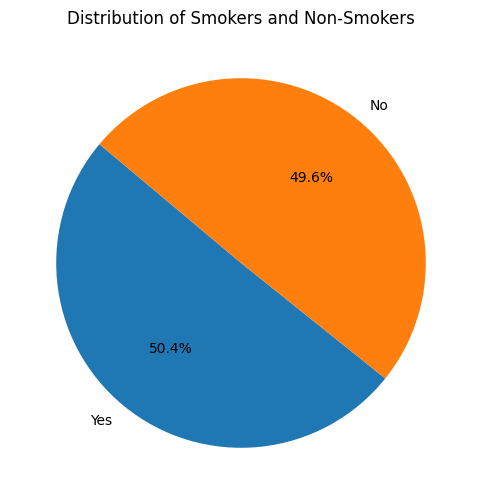

In [10]:
# Convert 'Do you smoke?' column to categorical for easier analysis
data['Do you smoke?'] = data['Do you smoke?'].astype('category')

# Calculate the percentage of smokers and non-smokers
smoker_counts = data['Do you smoke?'].value_counts() * 100

# Visualize the distribution of smokers and non-smokers using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smokers and Non-Smokers')
plt.show()

In [11]:
# Drop the unnecessary column(s)
columns_to_drop = ['Timestamp', 'Username']
data.drop(columns=columns_to_drop, inplace=True)

In [12]:
smoker_data = data[data['Do you smoke?'] == 'Yes']
smoker_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 2 to 686
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   Do you smoke?                                                           346 non-null    category
 1   What is your age?                                                       346 non-null    object  
 2   What is your gender?                                                    346 non-null    object  
 3   What is your current profession and monthly income? [Student]           272 non-null    object  
 4   What is your current profession and monthly income? [Businessman]       6 non-null      object  
 5   What is your current profession and monthly income? [Jobholder]         33 non-null     object  
 6   What is your current profession and monthly income? [Unemployed]        32 non-

In [13]:
smoker_data.describe()

,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
count,346,346,346,272,6,33,32,346,151,202,123,61,88,45,132,346,346
unique,1,5,3,5,3,5,4,5,31,33,19,16,19,15,24,5,23
top,Yes,18-24,Male,Under 20000,Under 20000,20000 - 40000,Under 20000,1 to 5,Because of Taste,Because of Taste,Because of Price,Because of Taste,Because of Taste,Because it has different flavors,Because of Price,9 to 12,Reduced price range;Better taste
freq,346,278,261,218,3,12,19,197,53,86,62,15,28,11,49,149,65


In [14]:
smoker_data.drop_duplicates(subset=None, inplace=True)

/tmp/ipykernel_34/2564902253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_data.drop_duplicates(subset=None, inplace=True)


# Percentage of Gender and Brand

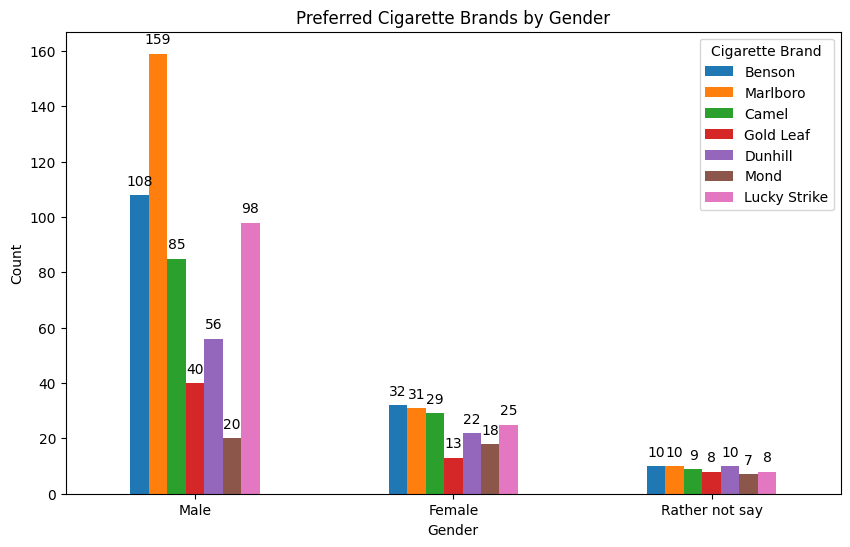

In [15]:
brand_preferences = {
    'Benson': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Marlboro': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Camel': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Gold Leaf': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Dunhill': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Mond': {'Male': 0, 'Female': 0, 'Rather not say': 0},
    'Lucky Strike': {'Male': 0, 'Female': 0, 'Rather not say': 0}
}

# Iterate through each row
total_responses = 0
for index, row in smoker_data.iterrows():
    # Get gender
    gender = row['What is your gender?']
    
    # If gender is NaN, skip this row
    if pd.isna(gender):
        continue
    
    # Iterate through columns to find brand preferences
    for column in smoker_data.columns:
        if column.startswith('Which brand of Cigarettes do you prefer, and why?'):
            brand = column.split('[')[1].split(']')[0]  # Extract brand name from column name
            if not pd.isna(row[column]):
                brand_preferences[brand][gender] += 1
                total_responses += 1

# Convert the brand_preferences dictionary to a DataFrame
brand_df = pd.DataFrame(brand_preferences)

# Plot the bar chart
ax = brand_df.plot(kind='bar', figsize=(10, 6))
plt.title('Preferred Cigarette Brands by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.legend(title='Cigarette Brand')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Correlation of smoker data using entire data without formatting

In [16]:
correlation_smoker_data = smoker_data.drop(columns=['Do you smoke?'])

In [17]:
# Label encode every column for checking the correlation of them
label_encoder = LabelEncoder()
for column in correlation_smoker_data.columns:
    correlation_smoker_data[column] = label_encoder.fit_transform(correlation_smoker_data[column])

In [18]:
correlation_smoker_data

,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,0,0,1,3,5,4,0,31,33,19,16,19,14,24,2,11
7,0,0,0,3,5,4,0,31,33,16,16,19,15,24,1,12
9,0,1,0,3,5,4,0,31,20,19,16,19,15,24,0,11
10,0,1,5,3,1,4,0,16,24,19,16,7,0,0,1,18
12,0,0,5,3,5,4,0,31,20,19,16,13,15,24,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0,1,4,3,5,4,2,16,33,19,16,19,15,24,0,1
680,0,1,4,3,5,4,0,31,33,19,12,19,15,24,4,5
683,0,0,5,3,5,3,4,1,20,19,4,3,2,5,0,17
685,0,1,4,3,5,4,1,31,20,19,16,19,15,24,2,9


In [19]:
# Handle missing values
correlation_smoker_data.dropna(inplace=True)

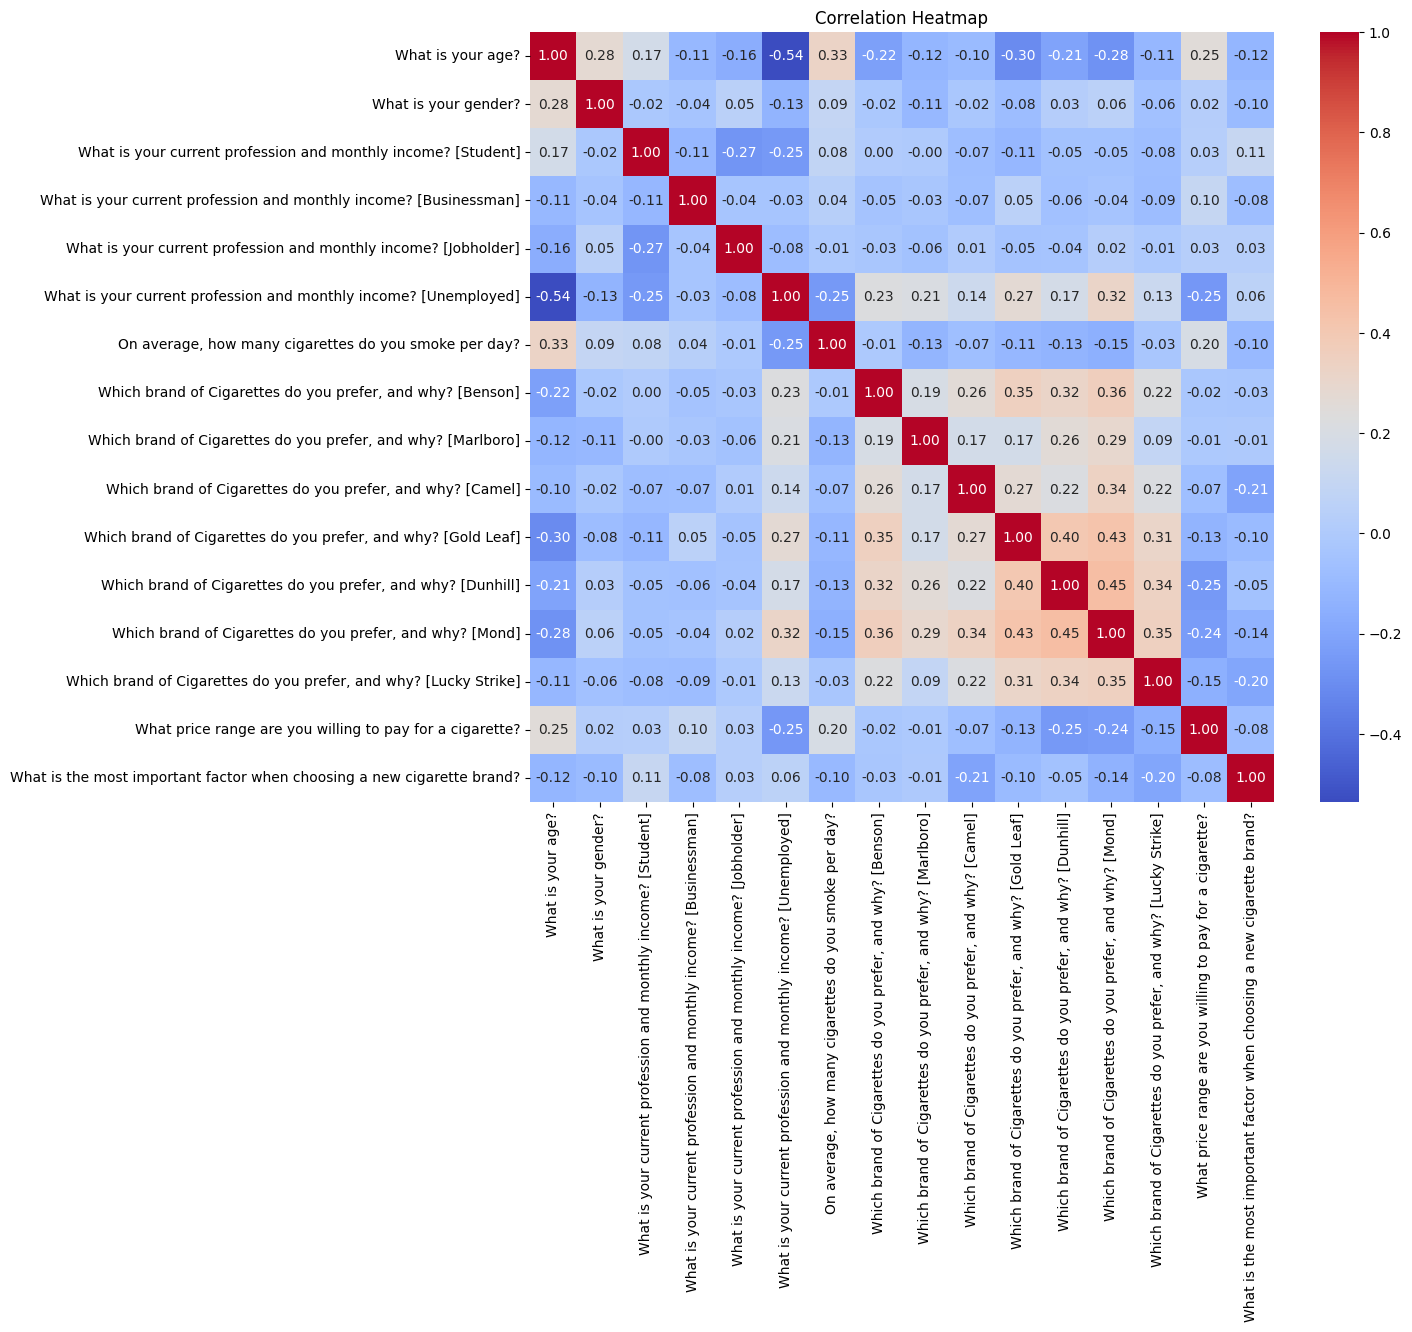

In [22]:
# Visualize correlation matrix
# Calculate correlation
correlation_matrix = correlation_smoker_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap1.png', dpi=300)
plt.show()

# Correlation of smoker data using some portion from data without formatting

In [23]:
correlation_smoker_data_portion = smoker_data.drop(columns=['Do you smoke?'])

In [24]:
# Drop the unnecessary column(s)
columns_to_drop = ['What is your age?', 'What is your gender?', 'What is your current profession and monthly income? [Student]', 'What is your current profession and monthly income? [Businessman]', 'What is your current profession and monthly income? [Jobholder]', 'What is your current profession and monthly income? [Unemployed]', 'On average, how many cigarettes do you smoke per day?', 'What price range are you willing to pay for a cigarette?', 'What is the most important factor when choosing a new cigarette brand?']
correlation_smoker_data_portion.drop(columns=columns_to_drop, inplace=True)

In [25]:
correlation_smoker_data_portion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 2 to 686
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Which brand of Cigarettes do you prefer, and why? [Benson]        150 non-null    object
 1   Which brand of Cigarettes do you prefer, and why? [Marlboro]      200 non-null    object
 2   Which brand of Cigarettes do you prefer, and why? [Camel]         123 non-null    object
 3   Which brand of Cigarettes do you prefer, and why? [Gold Leaf]     61 non-null     object
 4   Which brand of Cigarettes do you prefer, and why? [Dunhill]       88 non-null     object
 5   Which brand of Cigarettes do you prefer, and why? [Mond]          45 non-null     object
 6   Which brand of Cigarettes do you prefer, and why? [Lucky Strike]  131 non-null    object
dtypes: object(7)
memory usage: 21.5+ KB


In [26]:
correlation_smoker_data_portion.drop_duplicates(subset=None, inplace=True)
correlation_smoker_data_portion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 2 to 686
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Which brand of Cigarettes do you prefer, and why? [Benson]        122 non-null    object
 1   Which brand of Cigarettes do you prefer, and why? [Marlboro]      141 non-null    object
 2   Which brand of Cigarettes do you prefer, and why? [Camel]         98 non-null     object
 3   Which brand of Cigarettes do you prefer, and why? [Gold Leaf]     56 non-null     object
 4   Which brand of Cigarettes do you prefer, and why? [Dunhill]       80 non-null     object
 5   Which brand of Cigarettes do you prefer, and why? [Mond]          43 non-null     object
 6   Which brand of Cigarettes do you prefer, and why? [Lucky Strike]  103 non-null    object
dtypes: object(7)
memory usage: 14.0+ KB


In [27]:
# Label encode every column for checking the correlation of them
label_encoder = LabelEncoder()
for column in correlation_smoker_data_portion.columns:
    correlation_smoker_data_portion[column] = label_encoder.fit_transform(correlation_smoker_data_portion[column])

In [28]:
# Handle missing values
correlation_smoker_data_portion.dropna(inplace=True)

In [29]:
correlation_smoker_data_portion

,"Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]"
2,31,33,19,16,19,14,24
7,31,33,16,16,19,15,24
9,31,20,19,16,19,15,24
10,16,24,19,16,7,0,0
12,31,20,19,16,13,15,24
...,...,...,...,...,...,...,...
673,31,33,19,16,19,15,16
677,31,3,19,16,3,15,24
678,31,3,19,16,19,15,24
683,1,20,19,4,3,2,5


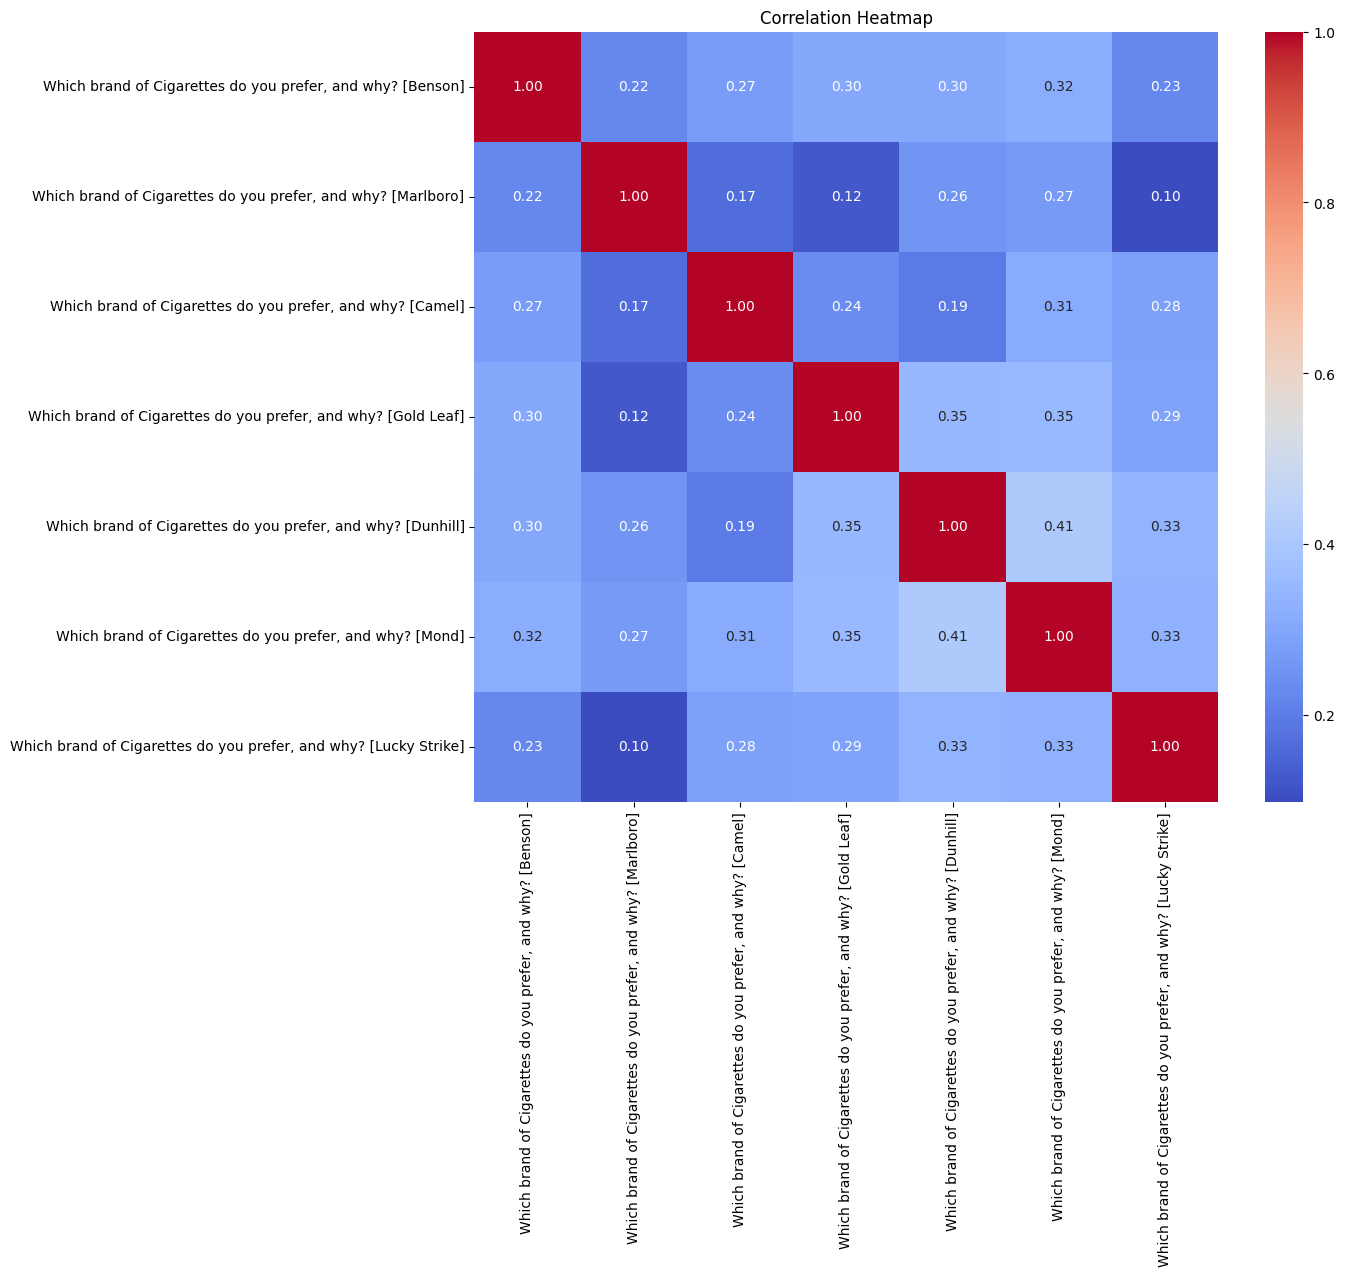

In [30]:
# Calculate correlation
correlation_matrix = correlation_smoker_data_portion.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Correlation of some portion from the data with formatting

In [31]:
# separating columns with multiple values
output_list = []

for entry in json_data_list:
    temp_entries = [entry.copy()]
    for key, value in entry.items():
        if isinstance(value, str) and ";" in value:
            factors = value.split(";")
            temp_entries = [temp_entry.update({key: factor.strip()}) or temp_entry.copy() for factor in factors for temp_entry in temp_entries]
    output_list.extend(temp_entries)

# Save the JSON data to a file
with open('updated.json', 'w') as outfile:
    json.dump(output_list, outfile, indent=4)

In [32]:
file_path = "/kaggle/working/updated.json"

# Load the JSON file into a DataFrame
json_data = pd.read_json(file_path)

# Display the DataFrame
json_data

,Timestamp,Username,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
0,2024-02-24 12:02:55-06:00,mumtahena.hussain@northsouth.edu,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-24 12:04:33-06:00,mahjabeenrasha13@gmail.com,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569972,2024-05-11 13:27:39-06:00,None,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569973,2024-05-11 14:09:24-06:00,None,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
569974,2024-05-12 12:07:06-06:00,None,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,2024-05-12 13:39:11-06:00,None,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [33]:
json_data = json_data[json_data['Do you smoke?'] == 'Yes']

In [34]:
# Drop the unnecessary column(s)
columns_to_drop = ['Timestamp', 'Username', 'Do you smoke?', 'What is your age?', 'What is your gender?', 'What is your current profession and monthly income? [Student]', 'What is your current profession and monthly income? [Businessman]', 'What is your current profession and monthly income? [Jobholder]', 'What is your current profession and monthly income? [Unemployed]', 'On average, how many cigarettes do you smoke per day?', 'What price range are you willing to pay for a cigarette?', 'What is the most important factor when choosing a new cigarette brand?']
json_data.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_34/2843484593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop(columns=columns_to_drop, inplace=True)


In [35]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569636 entries, 2 to 569976
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count   Dtype 
---  ------                                                            --------------   ----- 
 0   Which brand of Cigarettes do you prefer, and why? [Benson]        568473 non-null  object
 1   Which brand of Cigarettes do you prefer, and why? [Marlboro]      569024 non-null  object
 2   Which brand of Cigarettes do you prefer, and why? [Camel]         568512 non-null  object
 3   Which brand of Cigarettes do you prefer, and why? [Gold Leaf]     567298 non-null  object
 4   Which brand of Cigarettes do you prefer, and why? [Dunhill]       568113 non-null  object
 5   Which brand of Cigarettes do you prefer, and why? [Mond]          566795 non-null  object
 6   Which brand of Cigarettes do you prefer, and why? [Lucky Strike]  568398 non-null  object
dtypes: object(7)
memory usage: 34.8+ MB

In [36]:
json_data.drop_duplicates(subset=None, inplace=True)

/tmp/ipykernel_34/124871915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.drop_duplicates(subset=None, inplace=True)


In [37]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281036 entries, 2 to 569969
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count   Dtype 
---  ------                                                            --------------   ----- 
 0   Which brand of Cigarettes do you prefer, and why? [Benson]        280827 non-null  object
 1   Which brand of Cigarettes do you prefer, and why? [Marlboro]      280894 non-null  object
 2   Which brand of Cigarettes do you prefer, and why? [Camel]         280803 non-null  object
 3   Which brand of Cigarettes do you prefer, and why? [Gold Leaf]     280395 non-null  object
 4   Which brand of Cigarettes do you prefer, and why? [Dunhill]       280704 non-null  object
 5   Which brand of Cigarettes do you prefer, and why? [Mond]          280218 non-null  object
 6   Which brand of Cigarettes do you prefer, and why? [Lucky Strike]  280785 non-null  object
dtypes: object(7)
memory usage: 17.2+ MB

In [38]:
# Label encode every column for checking the correlation of them
label_encoder = LabelEncoder()
for column in json_data.columns:
    json_data[column] = label_encoder.fit_transform(json_data[column])

/tmp/ipykernel_34/3400733120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data[column] = label_encoder.fit_transform(json_data[column])
/tmp/ipykernel_34/3400733120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data[column] = label_encoder.fit_transform(json_data[column])
/tmp/ipykernel_34/3400733120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [39]:
# Handle missing values
json_data.dropna(inplace=True)

/tmp/ipykernel_34/1795238532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data.dropna(inplace=True)


In [40]:
json_data

,"Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]"
2,6,6,6,6,6,5,6
3,6,6,6,6,6,2,6
4,6,6,6,6,6,0,6
9,6,6,5,6,6,6,6
12,6,5,6,6,6,6,6
...,...,...,...,...,...,...,...
569909,6,6,6,6,4,6,6
569912,6,6,6,6,3,6,6
569954,6,6,6,6,6,6,2
569962,6,2,6,6,2,6,6


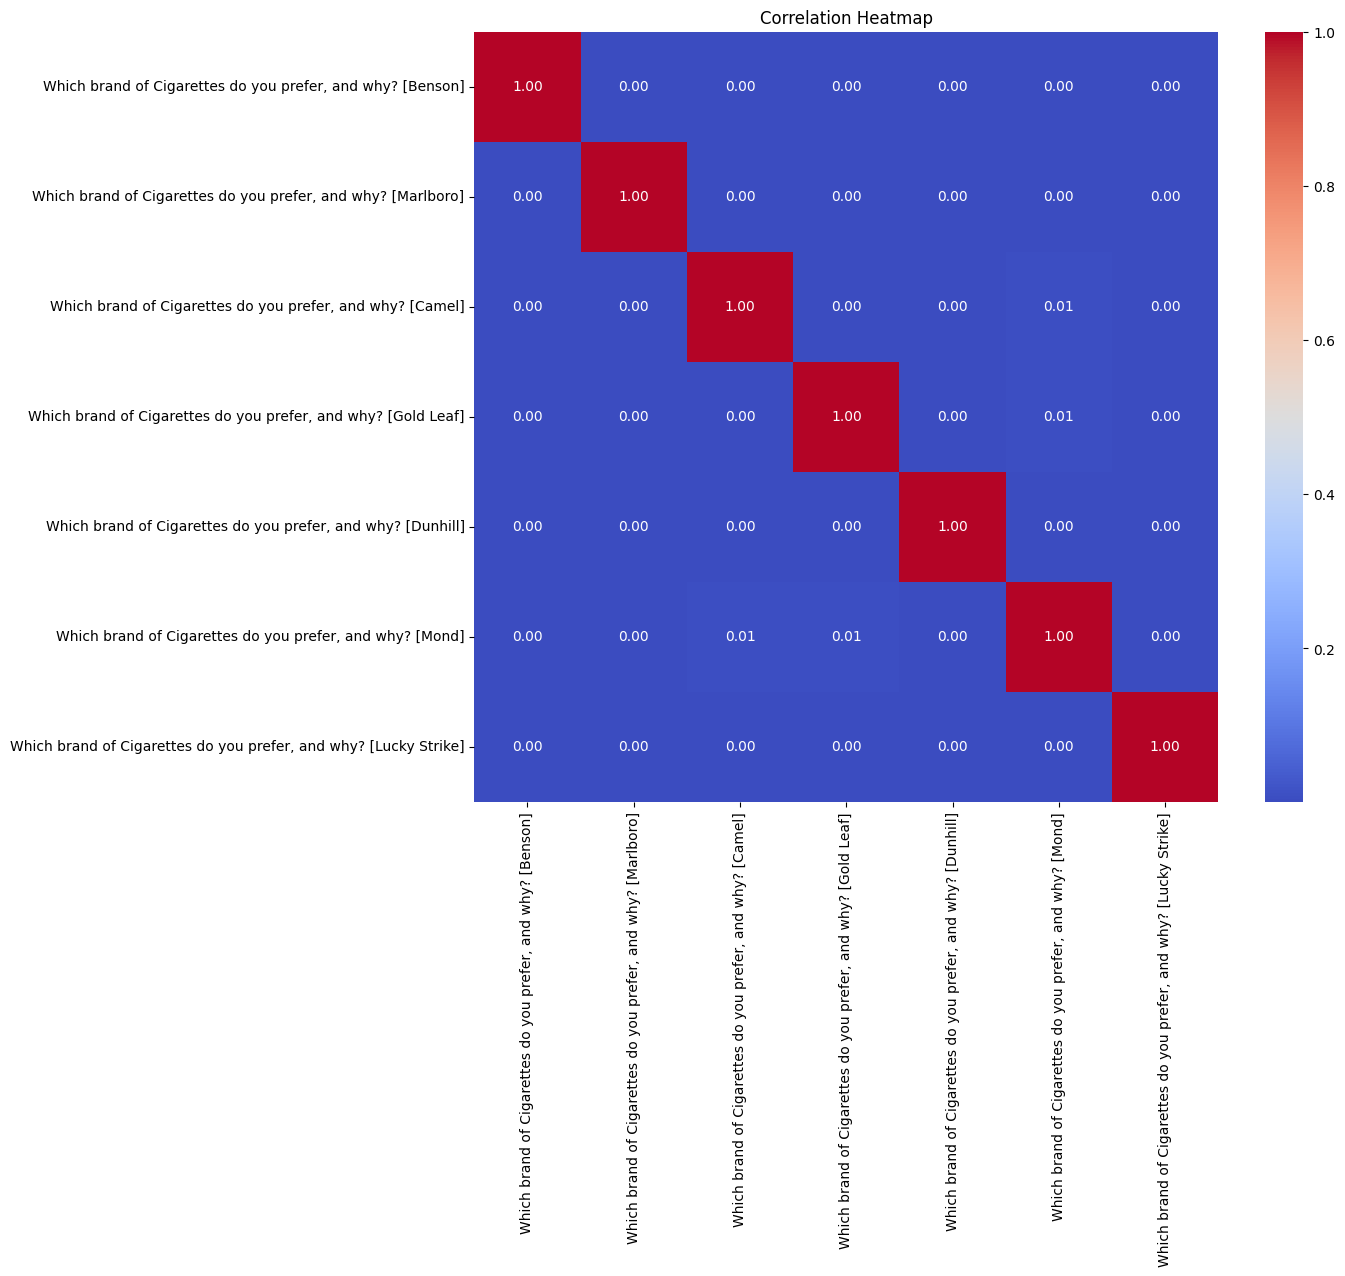

In [41]:
# Calculate correlation
correlation_matrix = json_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Correlation of smoker data using entire data with formatting

In [42]:
# Specify the file path
file_path = "/kaggle/working/updated.json"

# Load the JSON file into a DataFrame
json_data_full = pd.read_json(file_path)

# Display the DataFrame
json_data_full

,Timestamp,Username,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
0,2024-02-24 12:02:55-06:00,mumtahena.hussain@northsouth.edu,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-24 12:04:33-06:00,mahjabeenrasha13@gmail.com,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,2024-02-24 12:06:39-06:00,umamah.banath@northsouth.edu,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569972,2024-05-11 13:27:39-06:00,None,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569973,2024-05-11 14:09:24-06:00,None,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
569974,2024-05-12 12:07:06-06:00,None,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,2024-05-12 13:39:11-06:00,None,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [43]:
# Drop the unnecessary column(s)
columns_to_drop = ['Timestamp', 'Username']
json_data_full.drop(columns=columns_to_drop, inplace=True)

In [44]:
json_data_full = json_data_full[json_data_full['Do you smoke?'] == 'Yes']
json_data_full

,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
9,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Reduced price range
10,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Better taste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569971,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Less harmful alternative
569972,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569974,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [45]:
json_data_full.drop_duplicates(subset=None, inplace=True)
json_data_full

/tmp/ipykernel_34/1377605772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_data_full.drop_duplicates(subset=None, inplace=True)


,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
9,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Reduced price range
10,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Better taste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569971,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Less harmful alternative
569972,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569974,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [46]:
json_data_full = json_data_full.drop(columns=['Do you smoke?'])

In [47]:
# Label encode every column for checking the correlation of them
label_encoder = LabelEncoder()
for column in json_data_full.columns:
    json_data_full[column] = label_encoder.fit_transform(json_data_full[column])

In [48]:
# Handle missing values
json_data_full.dropna(inplace=True)
json_data_full

,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,0,0,1,3,5,4,0,6,6,6,6,6,5,6,2,4
3,0,0,1,3,5,4,0,6,6,6,6,6,2,6,2,4
4,0,0,1,3,5,4,0,6,6,6,6,6,0,6,2,4
9,0,0,0,3,5,4,0,6,6,5,6,6,6,6,1,4
10,0,0,0,3,5,4,0,6,6,5,6,6,6,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569971,0,0,5,3,5,3,4,1,5,6,4,2,3,4,0,3
569972,0,0,5,3,5,3,4,1,5,6,4,2,3,4,0,2
569974,0,1,4,3,5,4,1,6,5,6,6,6,6,6,2,3
569975,4,2,5,3,3,4,4,6,6,6,6,6,4,6,4,0


In [49]:
json_data_full.describe()

,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
count,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000,569544.000000
mean,3.941632,1.984165,4.984198,2.999882,4.998464,2.024270,3.962270,2.513016,2.514048,2.512438,2.519582,2.515593,2.519739,2.508403,3.980972,2.490396
std,0.468178,0.142862,0.178475,0.013834,0.079721,0.218991,0.377632,1.714242,1.710343,1.713906,1.716977,1.713516,1.723324,1.712448,0.222866,1.499828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,5.000000,3.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
50%,4.000000,2.000000,5.000000,3.000000,5.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000
75%,4.000000,2.000000,5.000000,3.000000,5.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,2.000000,5.000000,3.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000


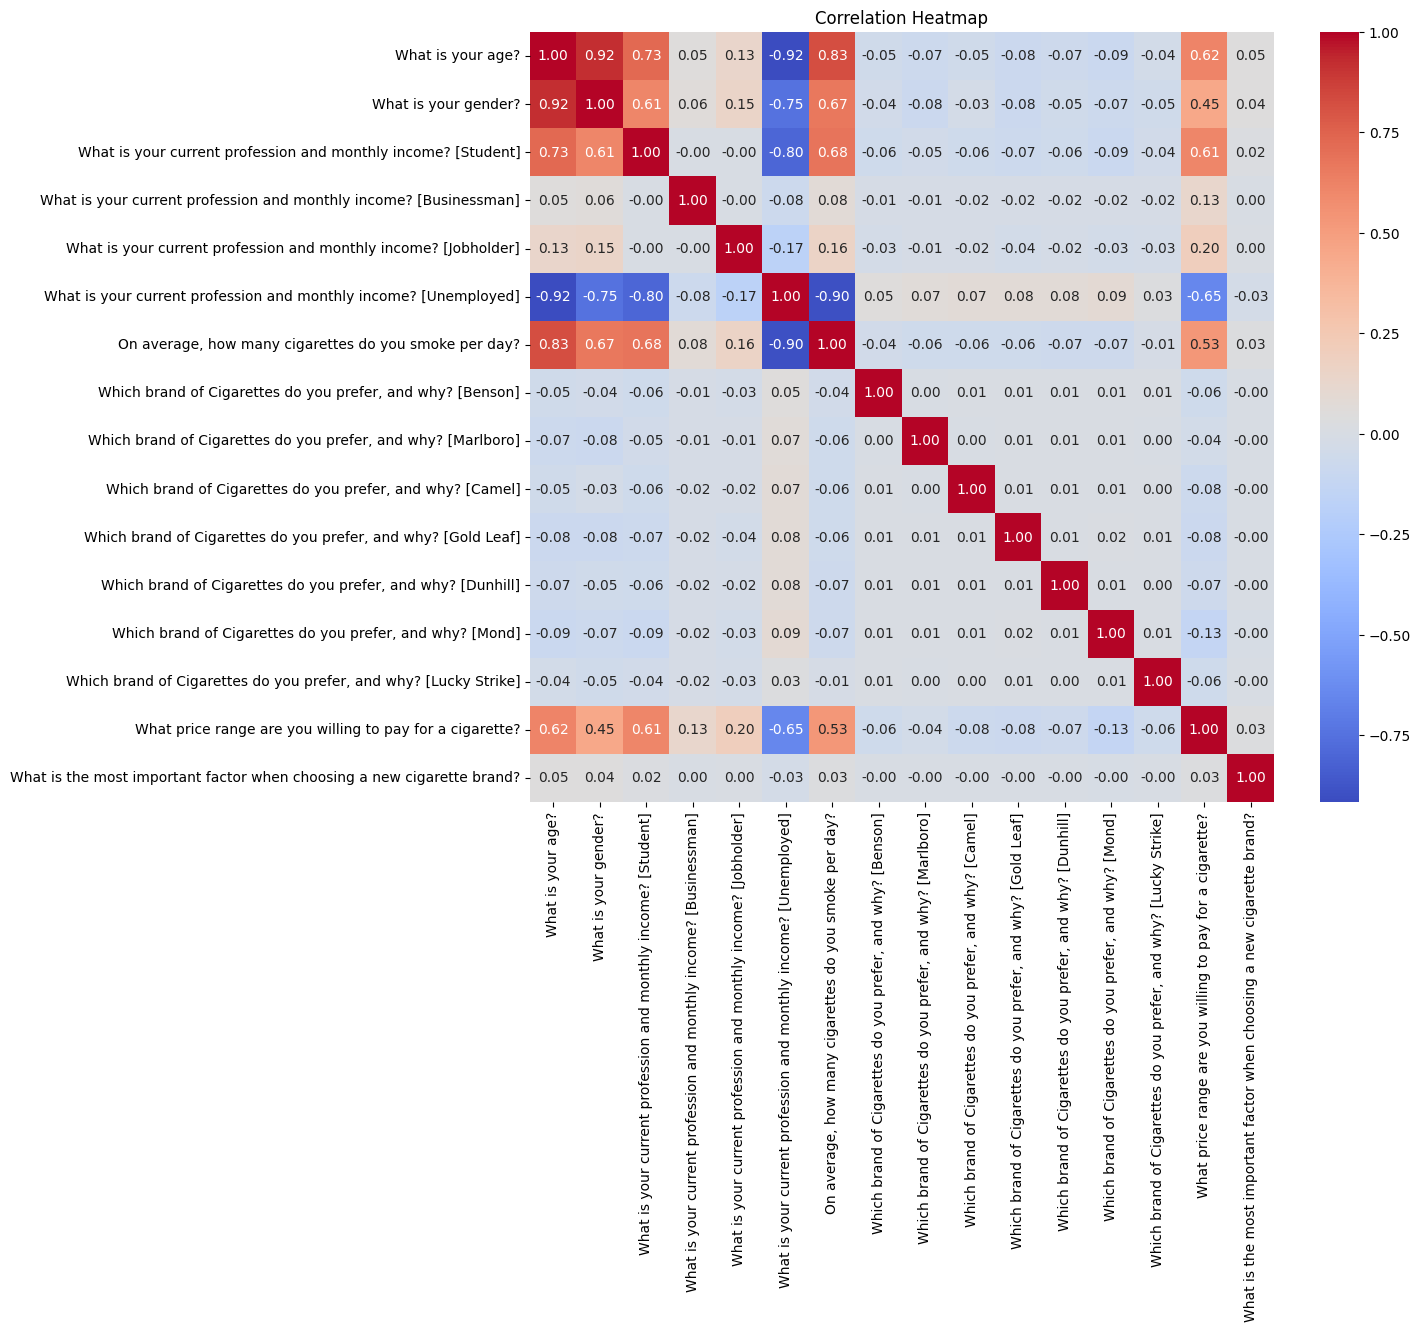

In [50]:
# Calculate correlation
correlation_matrix = json_data_full.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Checking outlier

In [51]:
attributes = ['What is your age?', 'What is your gender?', 
        'What is your current profession and monthly income? [Student]', 
        'What is your current profession and monthly income? [Businessman]', 
        'What is your current profession and monthly income? [Jobholder]', 
        'What is your current profession and monthly income? [Unemployed]', 
        'On average, how many cigarettes do you smoke per day?', 
        'Which brand of Cigarettes do you prefer, and why? [Benson]', 
        'Which brand of Cigarettes do you prefer, and why? [Marlboro]', 
        'Which brand of Cigarettes do you prefer, and why? [Camel]', 
        'Which brand of Cigarettes do you prefer, and why? [Gold Leaf]', 
        'Which brand of Cigarettes do you prefer, and why? [Dunhill]', 
        'Which brand of Cigarettes do you prefer, and why? [Mond]', 
        'Which brand of Cigarettes do you prefer, and why? [Lucky Strike]', 
        'What price range are you willing to pay for a cigarette?',
        'What is the most important factor when choosing a new cigarette brand?']

In [52]:
def count_outliers(data, column_name):
    column_data = data[column_name]
    # Calculate Q1 and Q3
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Min and Max Calculation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = column_data[(column_data<lower_bound) | (column_data>upper_bound)]
    return len(outliers)

In [53]:
for attribute in attributes:
    count = count_outliers(json_data_full,attribute)
    print(attribute,'-->',count,'out of',len(json_data_full[attribute]))


What is your age? --> 9642 out of 569544
What is your gender? --> 7645 out of 569544
What is your current profession and monthly income? [Student] --> 6601 out of 569544
What is your current profession and monthly income? [Businessman] --> 51 out of 569544
What is your current profession and monthly income? [Jobholder] --> 223 out of 569544
What is your current profession and monthly income? [Unemployed] --> 6964 out of 569544
On average, how many cigarettes do you smoke per day? --> 6235 out of 569544
Which brand of Cigarettes do you prefer, and why? [Benson] --> 0 out of 569544
Which brand of Cigarettes do you prefer, and why? [Marlboro] --> 0 out of 569544
Which brand of Cigarettes do you prefer, and why? [Camel] --> 0 out of 569544
Which brand of Cigarettes do you prefer, and why? [Gold Leaf] --> 0 out of 569544
Which brand of Cigarettes do you prefer, and why? [Dunhill] --> 0 out of 569544
Which brand of Cigarettes do you prefer, and why? [Mond] --> 0 out of 569544
Which brand of 

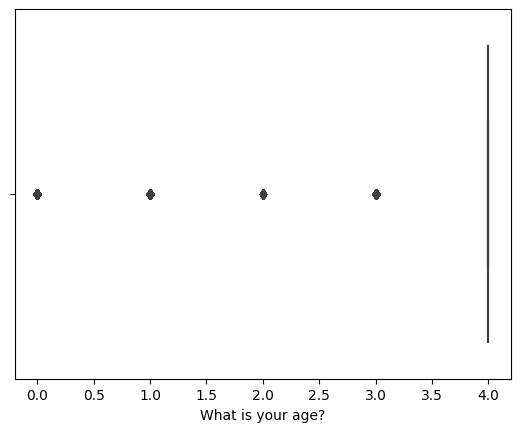

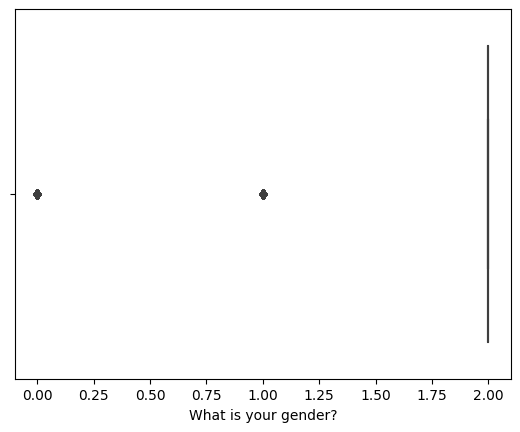

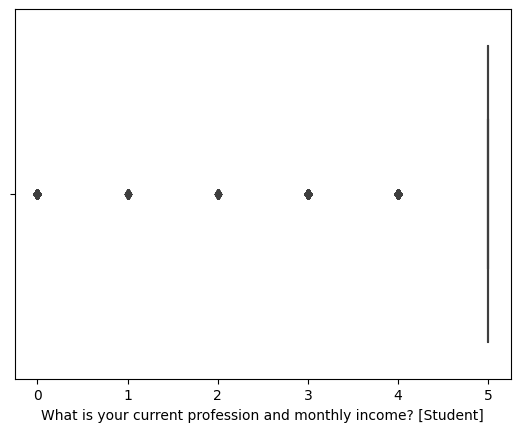

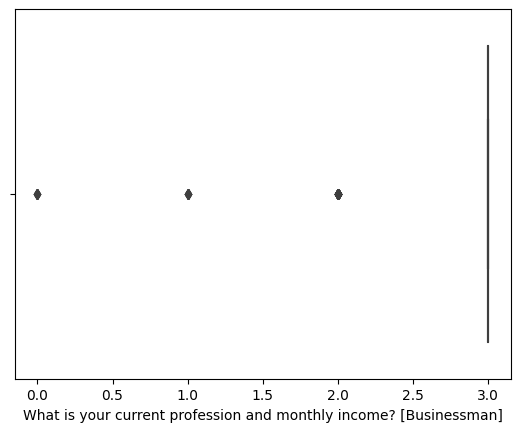

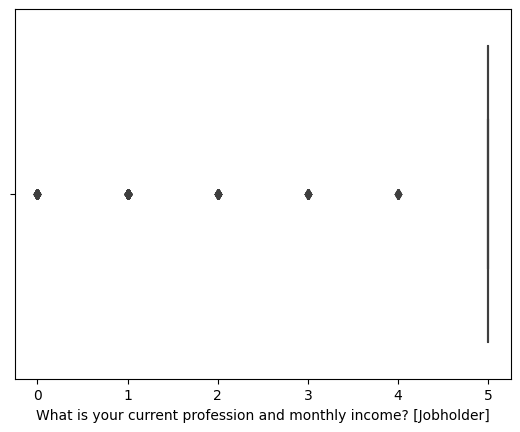

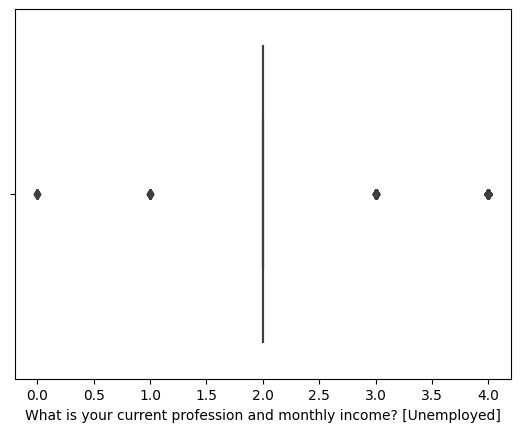

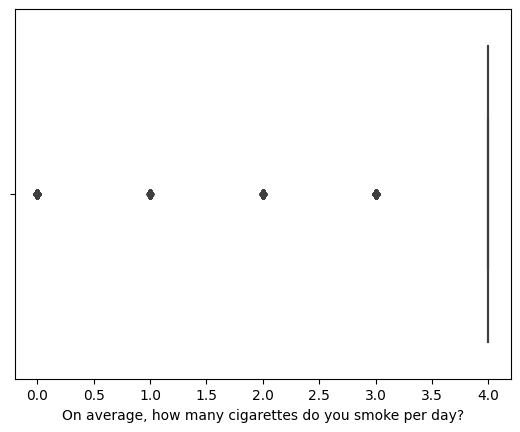

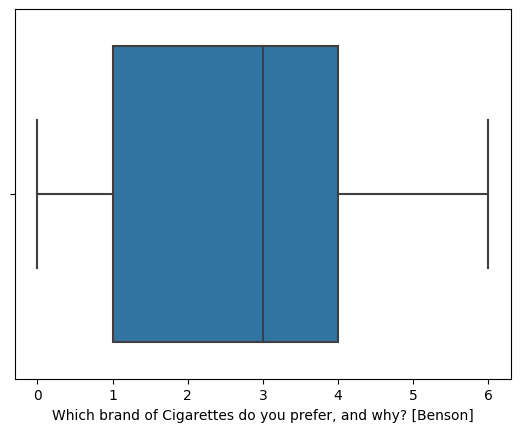

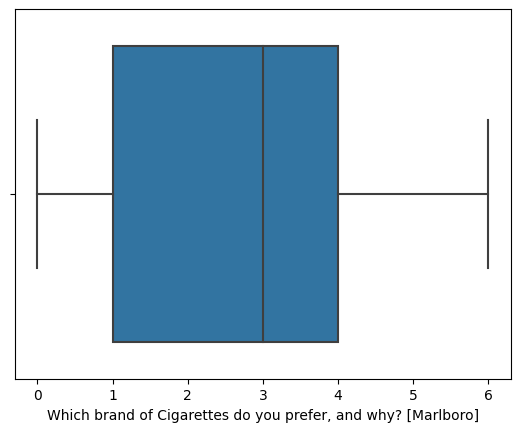

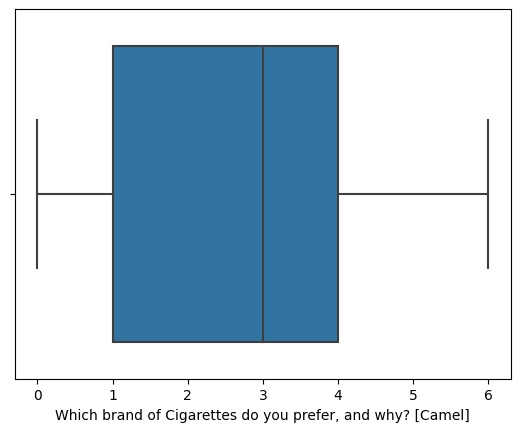

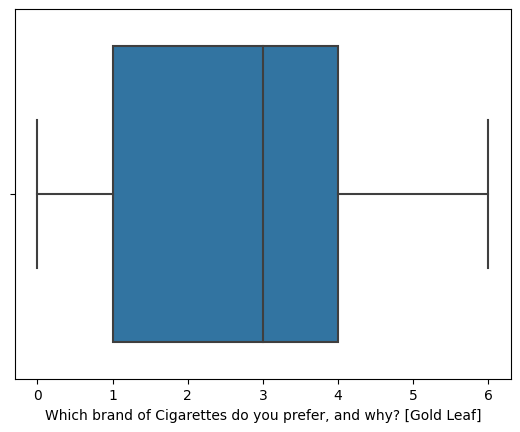

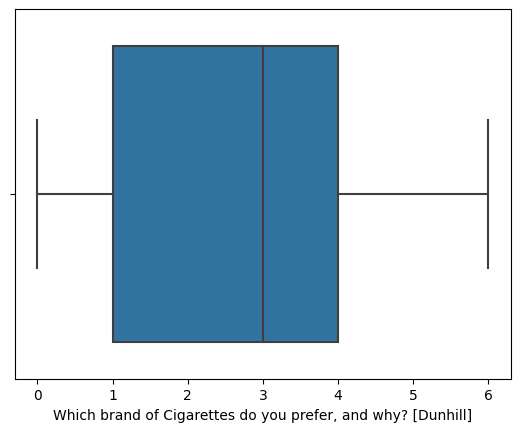

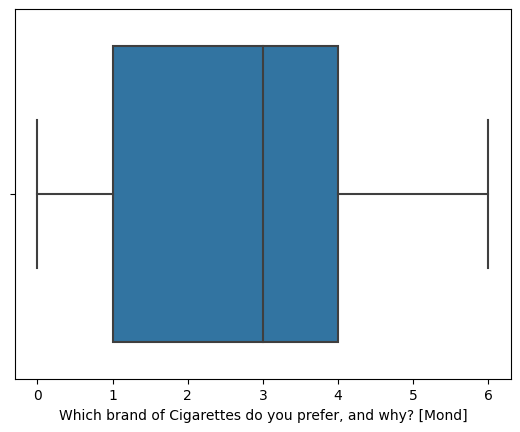

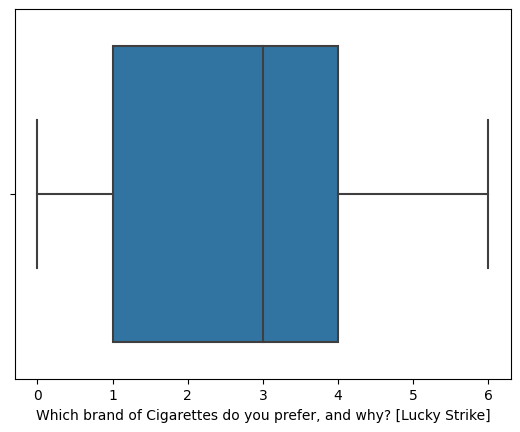

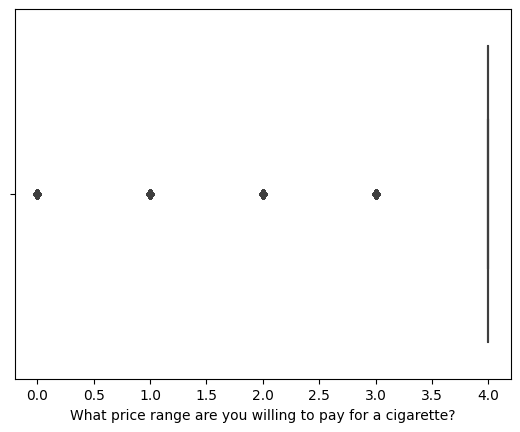

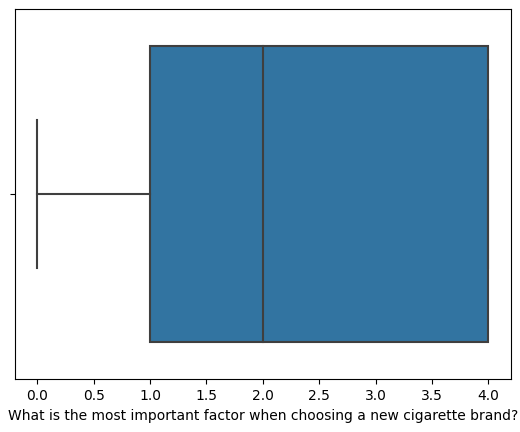

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over attributes
for attribute in attributes:
    sns.boxplot(x=json_data_full[attribute])
    plt.xlabel(attribute)
    plt.show()

### Remove Outlier

In [55]:
def remove_outliers(data, column_name):
    column_data = data[column_name]
    # Calculate Q1 and Q3
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Min and Max Calculation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = data[(data[column_name]>=lower_bound) & (data[column_name]<=upper_bound)]
    return cleaned_df

In [56]:
list_oulier = ['What is your age?', 'What is your gender?', 
        'What is your current profession and monthly income? [Student]', 
        'What is your current profession and monthly income? [Businessman]', 
        'What is your current profession and monthly income? [Jobholder]', 
        'What is your current profession and monthly income? [Unemployed]', 
        'On average, how many cigarettes do you smoke per day?', 
        'Which brand of Cigarettes do you prefer, and why? [Benson]', 
        'Which brand of Cigarettes do you prefer, and why? [Marlboro]', 
        'Which brand of Cigarettes do you prefer, and why? [Camel]', 
        'Which brand of Cigarettes do you prefer, and why? [Gold Leaf]', 
        'Which brand of Cigarettes do you prefer, and why? [Dunhill]', 
        'Which brand of Cigarettes do you prefer, and why? [Mond]', 
        'Which brand of Cigarettes do you prefer, and why? [Lucky Strike]', 
        'What price range are you willing to pay for a cigarette?']

In [57]:
df_new = json_data_full

In [58]:
for index in list_oulier:
    df_cleaned = remove_outliers(df_new, index)
    print('Original df:',df_new.shape)
    print('Cleaned df:',df_cleaned.shape)

Original df: (569544, 16)
Cleaned df: (559902, 16)
Original df: (569544, 16)
Cleaned df: (561899, 16)
Original df: (569544, 16)
Cleaned df: (562943, 16)
Original df: (569544, 16)
Cleaned df: (569493, 16)
Original df: (569544, 16)
Cleaned df: (569321, 16)
Original df: (569544, 16)
Cleaned df: (562580, 16)
Original df: (569544, 16)
Cleaned df: (563309, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (569544, 16)
Original df: (569544, 16)
Cleaned df: (564403, 16)


In [59]:
df_cleaned

,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
107,0,0,5,3,3,4,4,6,1,6,6,5,6,6,4,1
108,0,0,4,3,5,4,0,6,6,6,6,5,6,6,4,1
109,0,0,4,3,5,4,0,6,6,6,6,2,6,6,4,1
110,0,0,4,3,5,4,0,6,6,6,6,5,6,6,4,2
111,0,0,4,3,5,4,0,6,6,6,6,2,6,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569962,0,0,2,3,5,4,4,6,2,6,6,2,6,6,4,2
569965,0,1,4,3,5,4,0,6,6,6,5,6,6,6,4,1
569966,0,1,4,3,5,4,0,6,6,6,5,6,6,6,4,3
569975,4,2,5,3,3,4,4,6,6,6,6,6,4,6,4,0


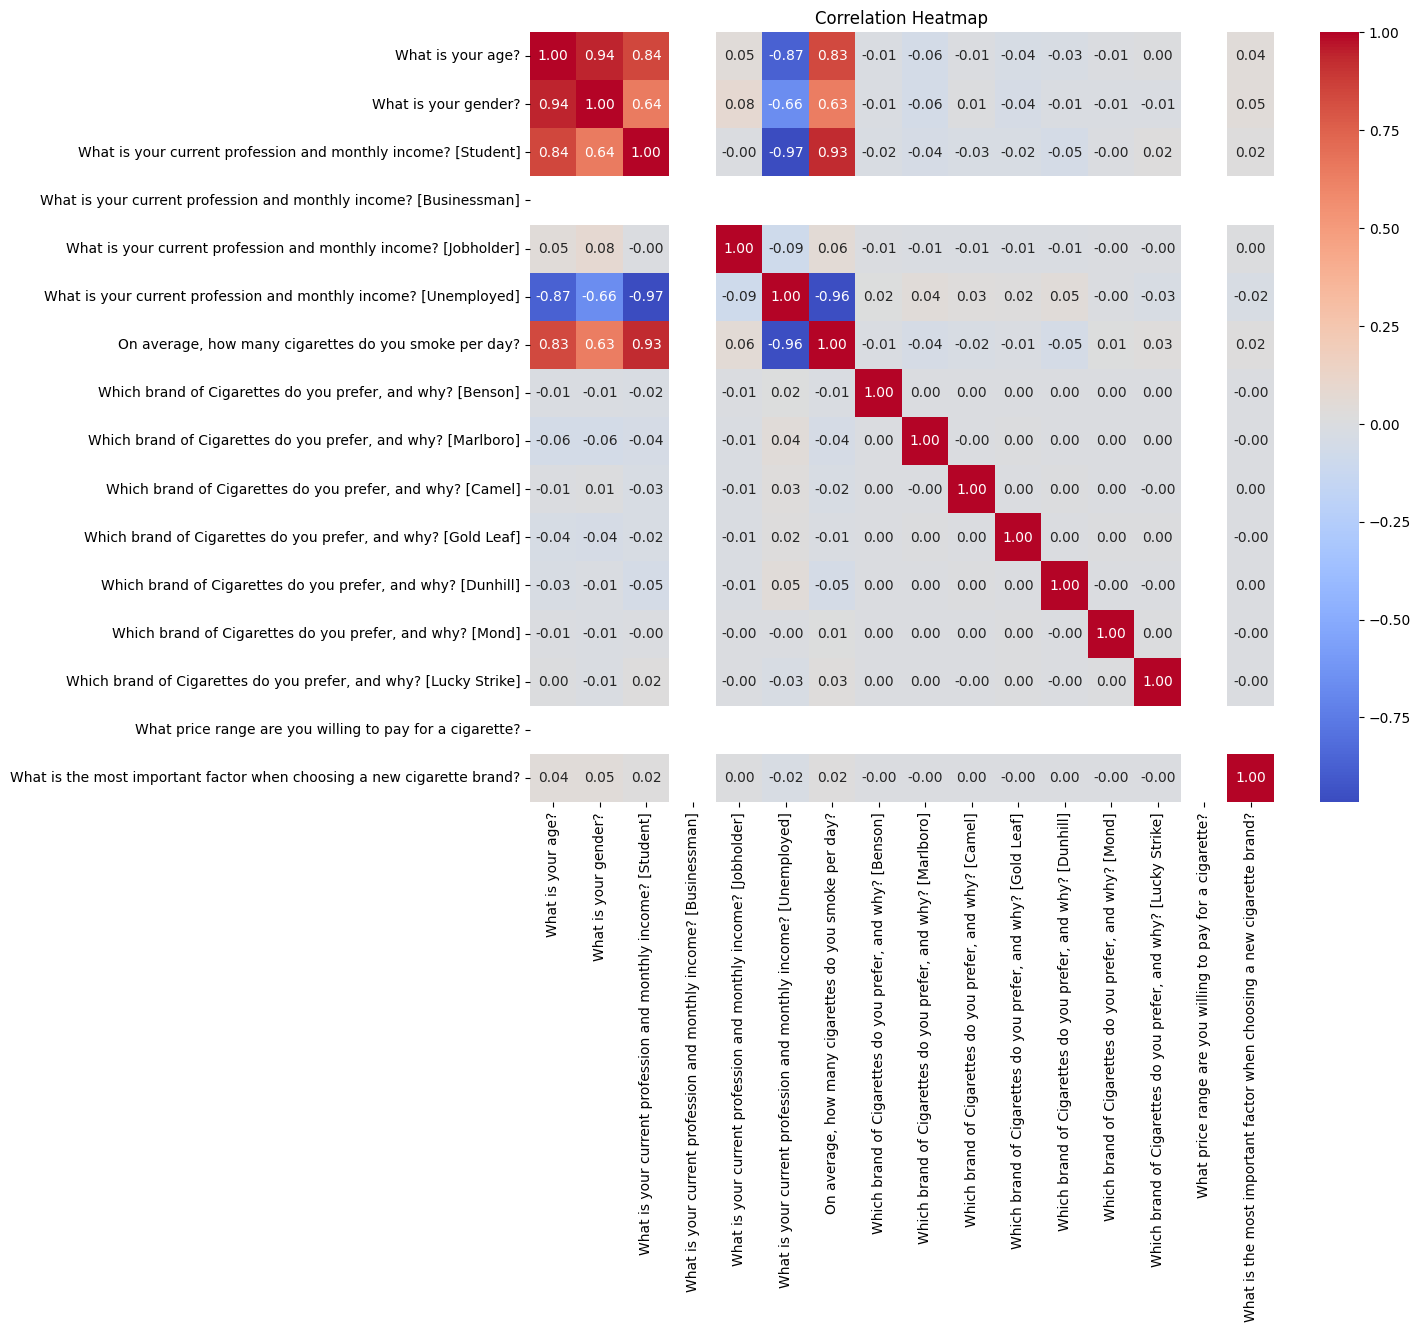

In [60]:
# Calculate correlation
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Identifying each brand chosing and their reasons as a percentage

In [61]:
# Identify columns with semicolon-separated values
columns_with_reasons = ['Which brand of Cigarettes do you prefer, and why? [Benson]',
                        'Which brand of Cigarettes do you prefer, and why? [Marlboro]',
                        'Which brand of Cigarettes do you prefer, and why? [Camel]',
                        'Which brand of Cigarettes do you prefer, and why? [Gold Leaf]',
                        'Which brand of Cigarettes do you prefer, and why? [Dunhill]',
                        'Which brand of Cigarettes do you prefer, and why? [Mond]',
                        'Which brand of Cigarettes do you prefer, and why? [Lucky Strike]']

# Create DataFrame to store reasons
reasons_df = pd.DataFrame(columns=['Brand', 'Reason'])

# Iterate over columns and split reasons by semicolon
for col in columns_with_reasons:
    if col in smoker_data.columns:  # Check if the column exists in the DataFrame
        reasons = smoker_data[col].str.split(';').explode()
        brand_name = col.split('[')[1].split(']')[0]  # Extract brand name from column name
        reasons_df = pd.concat([reasons_df, pd.DataFrame({'Brand': brand_name, 'Reason': reasons})], ignore_index=True)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Drop rows with None values
reasons_df.dropna(inplace=True)

# Display the DataFrame
reasons_df

,Brand,Reason
3,Benson,Because of Taste
6,Benson,Because of Taste
7,Benson,Because of Price
8,Benson,Because of Taste
13,Benson,Because of Price
...,...,...
2870,Lucky Strike,Because of Price
2872,Lucky Strike,Because of Price
2873,Lucky Strike,Because of Taste
2874,Lucky Strike,Because of Good packaging


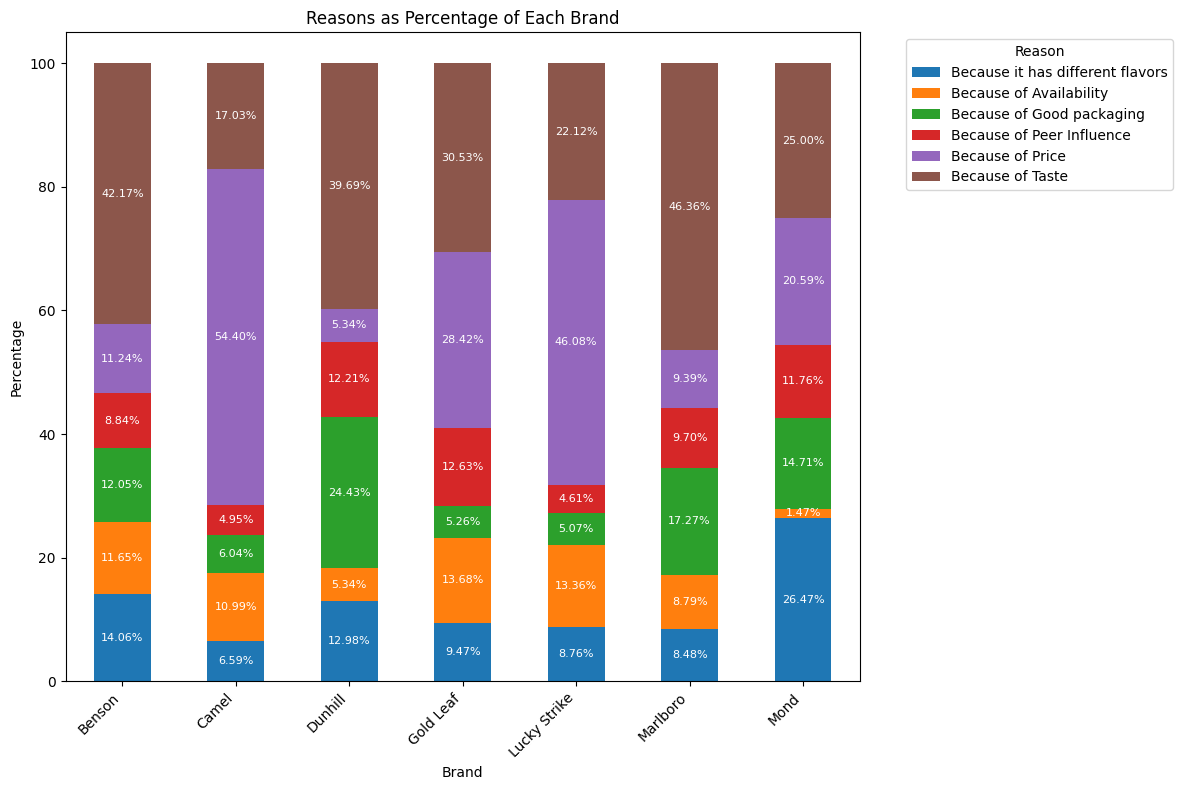

In [62]:
# Assuming reasons_df is your DataFrame containing the brand and reasons data
# You can create a new DataFrame with the percentages of each reason for each brand
reasons_percentages = reasons_df.groupby(['Brand', 'Reason']).size().unstack().div(reasons_df.groupby('Brand').size(), axis=0) * 100

# Plotting
ax = reasons_percentages.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding percentage labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white')

plt.title('Reasons as Percentage of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Percentage')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

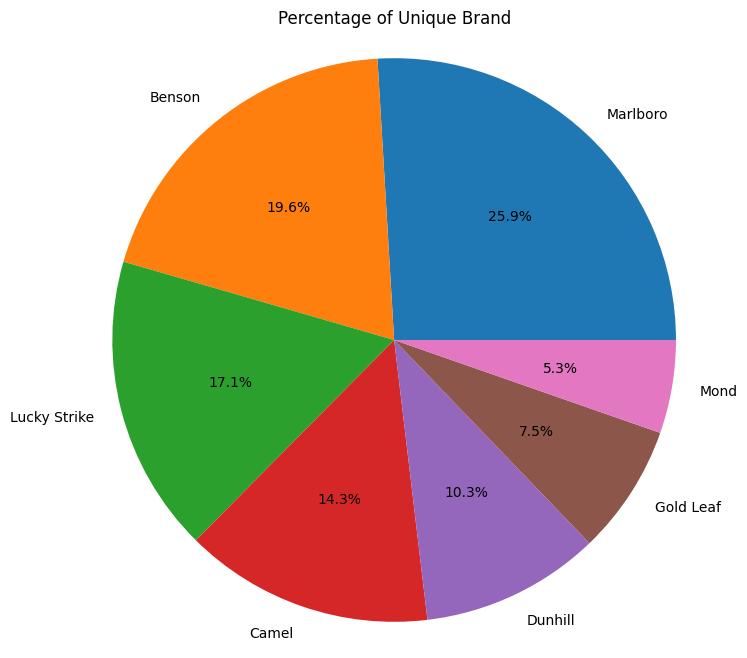

In [63]:
# percentage of unique brand
brand_percentage = reasons_df['Brand'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 8))
plt.pie(brand_percentage, labels=brand_percentage.index, autopct='%1.1f%%')
plt.title('Percentage of Unique Brand')
plt.axis('equal')
plt.show()

# Calculate gender distribution

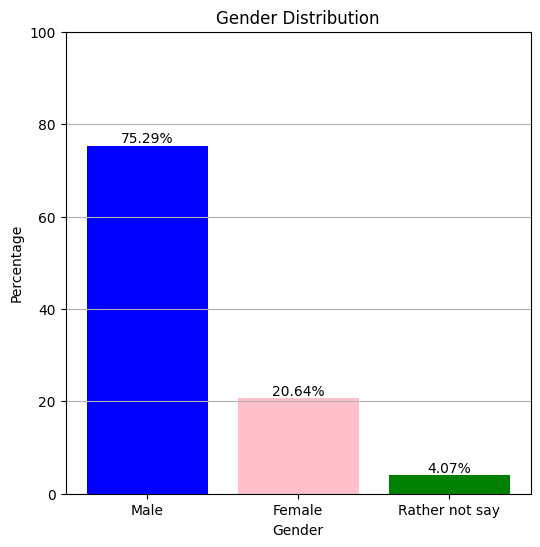

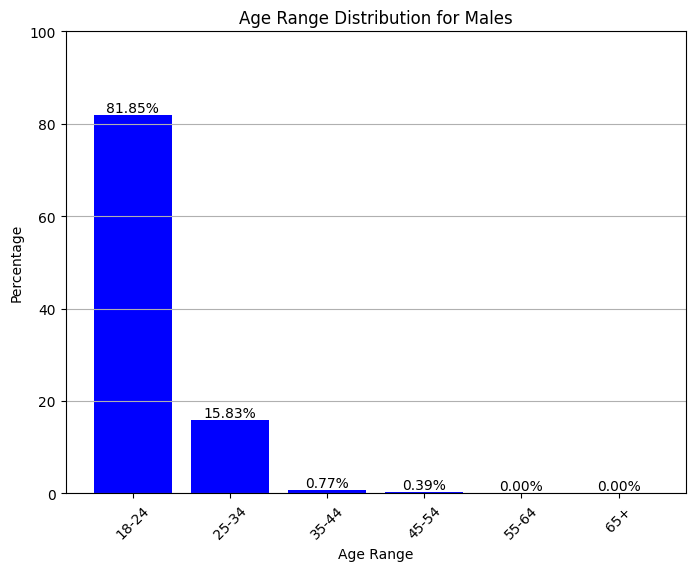

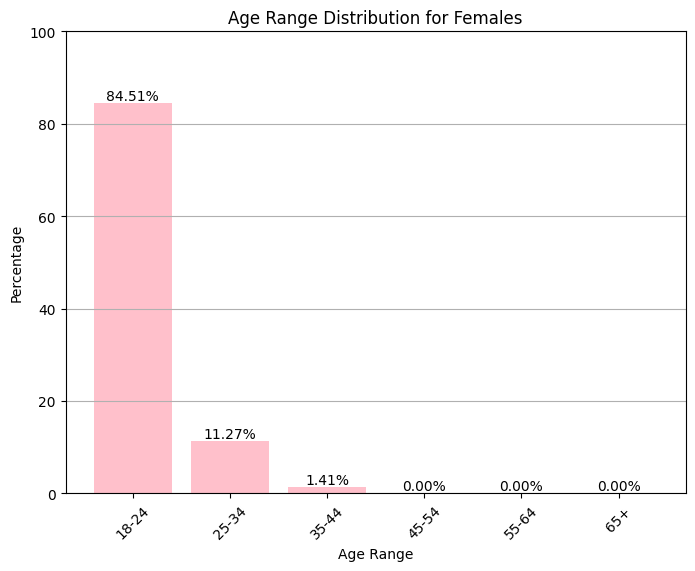

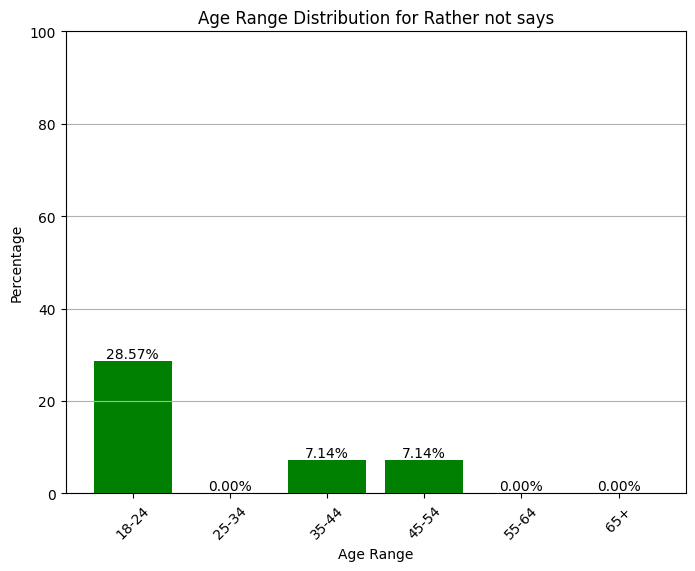

In [66]:
# Calculate gender distribution
gender_counts = smoker_data['What is your gender?'].value_counts()
male_percentage = (gender_counts.get('Male', 0) / len(smoker_data)) * 100
female_percentage = (gender_counts.get('Female', 0) / len(smoker_data)) * 100
rather_percentage = (gender_counts.get('Rather not say', 0) / len(smoker_data)) * 100

# Plot gender distribution
plt.figure(figsize=(6, 6))
bars = plt.bar(['Male', 'Female', 'Rather not say'], [male_percentage, female_percentage, rather_percentage], color=['blue', 'pink', 'green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y')

# Add percentages on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Calculate and plot age range distribution for males and females
age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

for gender in ['Male', 'Female', 'Rather not say']:
    gender_df = smoker_data[smoker_data['What is your gender?'] == gender]
    age_counts = gender_df['What is your age?'].value_counts()
    age_percentages = [(age_counts.get(age, 0) / len(gender_df)) * 100 for age in age_ranges]

    plt.figure(figsize=(8, 6))
    if gender == "Male":
        color = 'blue'
    elif gender == "Female":
        color = 'pink'
    else:
        color = 'green'
    bars = plt.bar(age_ranges, age_percentages, color=color)
    plt.title(f'Age Range Distribution for {gender}s')
    plt.xlabel('Age Range')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add percentages on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

    plt.show()

# Calculate distribution of smoked per day

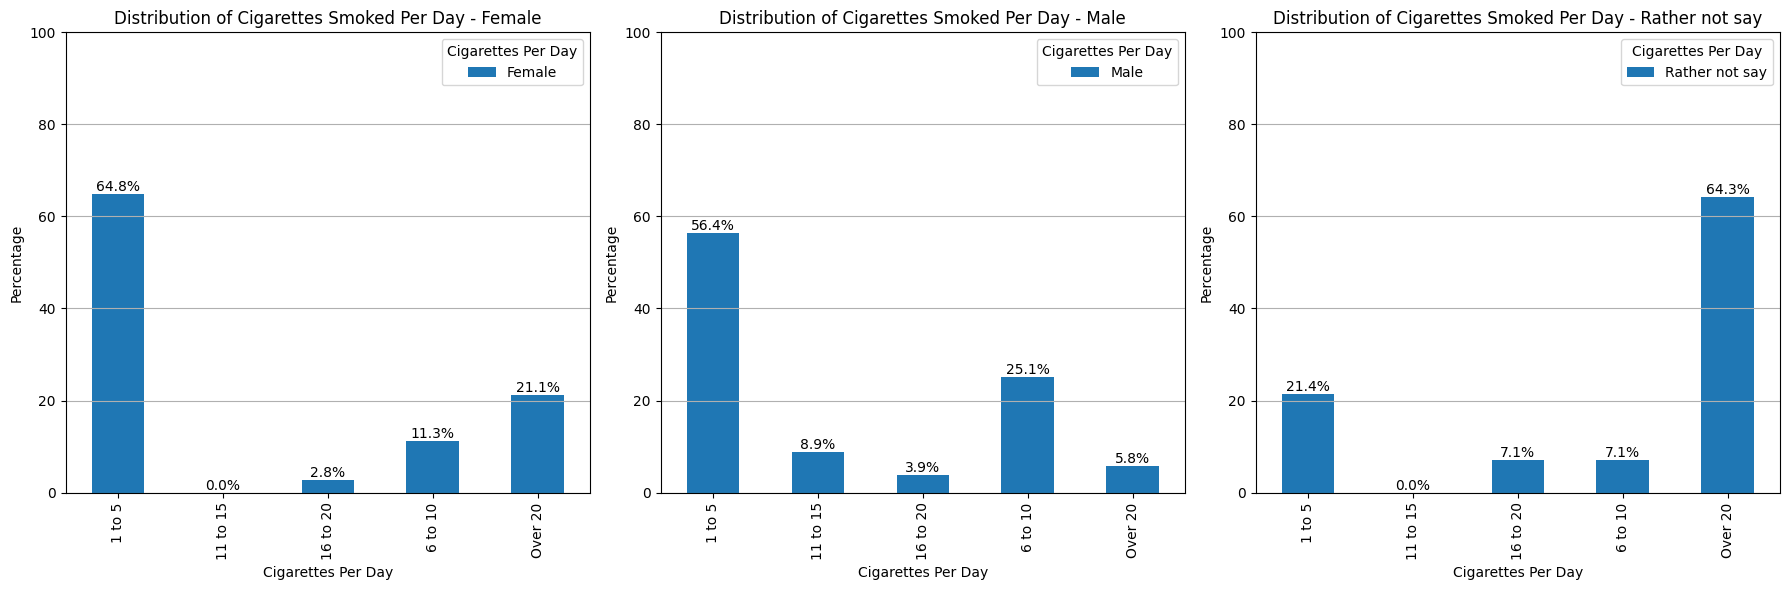

In [67]:
# Group data by gender and count the occurrences of each category
gender_cigarettes_count = smoker_data.groupby(['What is your gender?', 'On average, how many cigarettes do you smoke per day?']).size().unstack()

# Normalize the counts to percentages
gender_cigarettes_percent = gender_cigarettes_count.div(gender_cigarettes_count.sum(axis=1), axis=0) * 100

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, gender in enumerate(gender_cigarettes_percent.index):
    ax = axes[i]
    gender_cigarettes_percent.loc[gender].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Distribution of Cigarettes Smoked Per Day - {gender}')
    ax.set_xlabel('Cigarettes Per Day')
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.grid(axis='y')
    ax.legend(title='Cigarettes Per Day')

    # Add percentages on top of each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

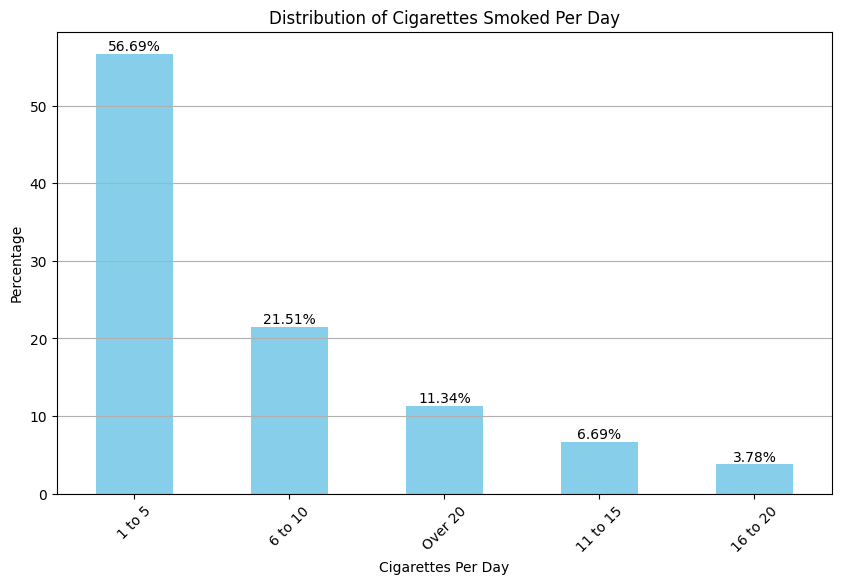

In [68]:
# Count the occurrences of each category
cigarettes_count = smoker_data['On average, how many cigarettes do you smoke per day?'].value_counts()

# Calculate percentages
cigarettes_percent = (cigarettes_count / cigarettes_count.sum()) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = cigarettes_percent.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cigarettes Smoked Per Day')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add percentages on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Calculate income distribution

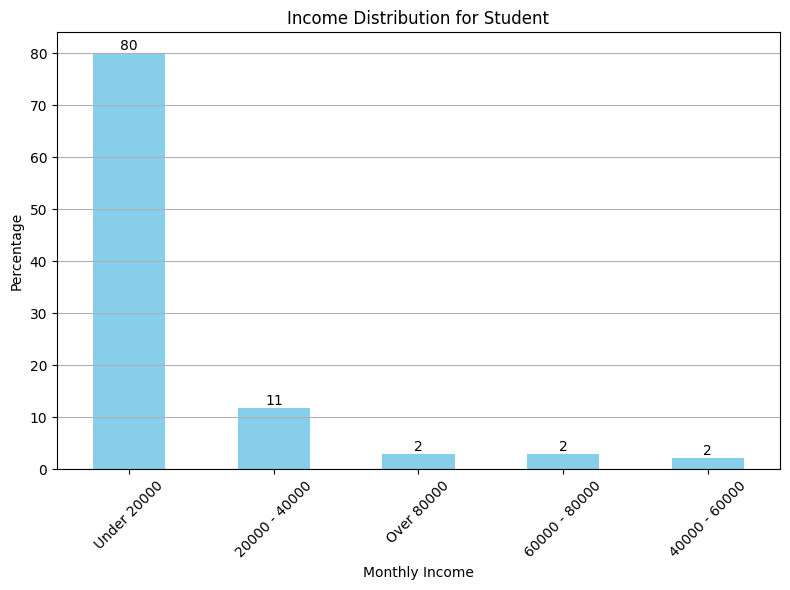

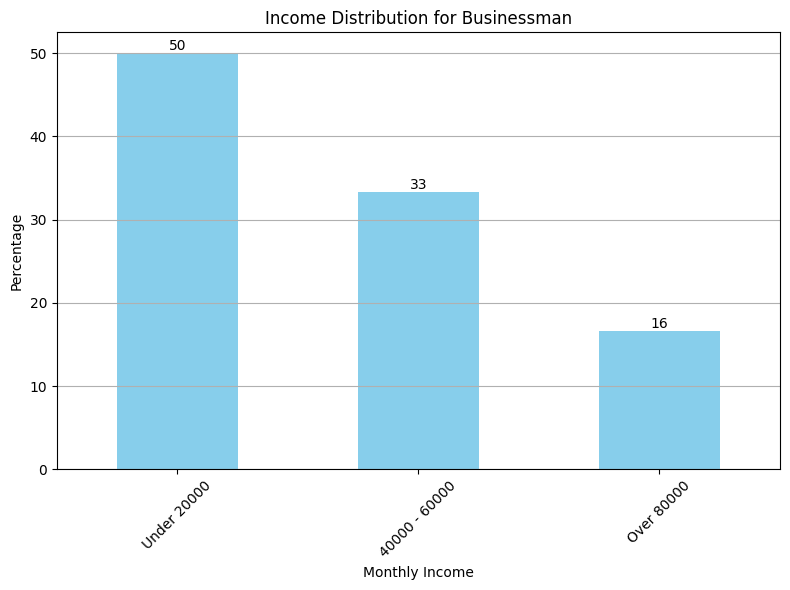

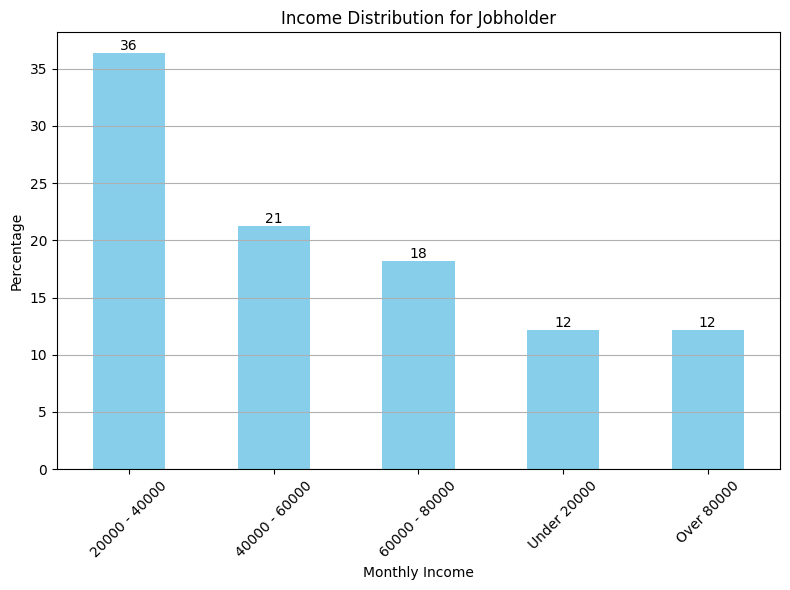

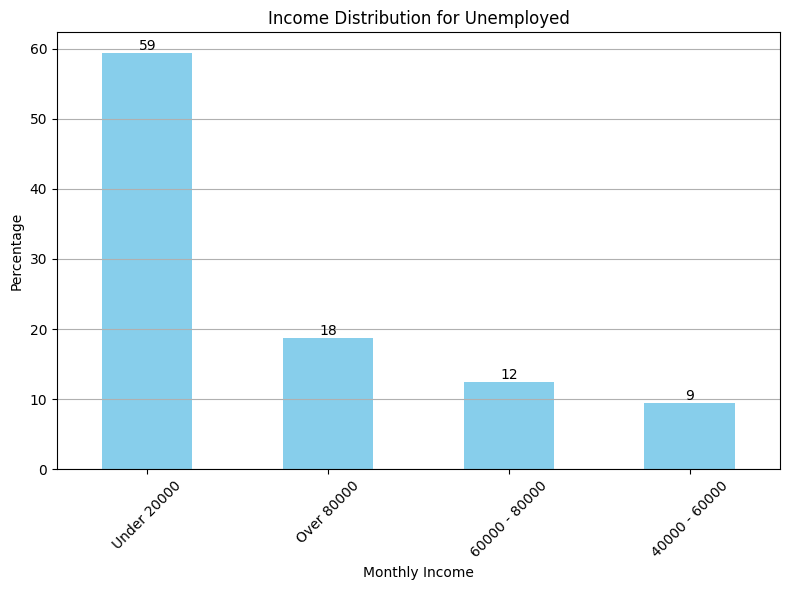

In [69]:
# Columns related to current profession and monthly income
columns = [
    'What is your current profession and monthly income? [Student]',
    'What is your current profession and monthly income? [Businessman]',
    'What is your current profession and monthly income? [Jobholder]',
    'What is your current profession and monthly income? [Unemployed]'
]

# Extract profession names from column names
profession_names = [col.split('[')[1][:-1] for col in columns]

# Initialize a dictionary to store income percentages for each profession
income_percentages = {}

# Calculate income percentages for each profession
for column, profession in zip(columns, profession_names):
    # Count the occurrences of each income category
    income_count = smoker_data[column].value_counts()
    
    # Calculate percentages
    income_percent = (income_count / income_count.sum()) * 100
    
    # Store percentages in the dictionary
    income_percentages[profession] = income_percent

# Plotting separate plots for each profession
for profession, percentages in income_percentages.items():
    plt.figure(figsize=(8, 6))
    bars = percentages.plot(kind='bar', color='skyblue')
    plt.title(f'Income Distribution for {profession}')
    plt.xlabel('Monthly Income')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Add counts on top of the bars
    for bar in bars.patches:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# ML Implementation

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [71]:
# Specify the file path
file_path = "/kaggle/working/updated.json"

# Load the JSON file into a DataFrame
df = pd.read_json(file_path)

In [72]:
# Drop the unnecessary column(s)
columns_to_drop = ['Timestamp', 'Username']
df.drop(columns=columns_to_drop, inplace=True)
df

,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
0,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569972,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569973,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
569974,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [73]:
df.describe()

,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
count,569977,569636,569636,6690,51,224,562656,569636,568473,569024,568512,567298,568113,566795,568398,569636,569636
unique,2,5,3,5,3,5,4,5,6,6,6,6,6,6,6,5,5
top,Yes,55+,Rather not say,Under 20000,Under 20000,40000 - 60000,Over 80000,Over 20,Because of Taste,Because of Good packaging,Because of Price,Because of Price,Because of Good packaging,Because of Price,Because of Price,Over 18,Better taste
freq,569636,559903,561900,5432,40,129,562580,563310,96332,97223,96567,95598,96747,95697,95550,564410,283463


In [74]:
df = df[df['Do you smoke?'] == 'Yes']
df

,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
9,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Reduced price range
10,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Better taste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569971,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Less harmful alternative
569972,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569974,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [75]:
df.drop_duplicates(subset=None, inplace=True)
df

/tmp/ipykernel_34/3952697895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=None, inplace=True)


,Do you smoke?,What is your age?,What is your gender?,What is your current profession and monthly income? [Student],What is your current profession and monthly income? [Businessman],What is your current profession and monthly income? [Jobholder],What is your current profession and monthly income? [Unemployed],"On average, how many cigarettes do you smoke per day?","Which brand of Cigarettes do you prefer, and why? [Benson]","Which brand of Cigarettes do you prefer, and why? [Marlboro]","Which brand of Cigarettes do you prefer, and why? [Camel]","Which brand of Cigarettes do you prefer, and why? [Gold Leaf]","Which brand of Cigarettes do you prefer, and why? [Dunhill]","Which brand of Cigarettes do you prefer, and why? [Mond]","Which brand of Cigarettes do you prefer, and why? [Lucky Strike]",What price range are you willing to pay for a cigarette?,What is the most important factor when choosing a new cigarette brand?
2,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Taste,None,9 to 12,Reduced price range
3,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because of Good packaging,None,9 to 12,Reduced price range
4,Yes,18-24,Female,40000 - 60000,None,None,None,1 to 5,None,None,None,None,None,Because it has different flavors,None,9 to 12,Reduced price range
9,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Reduced price range
10,Yes,18-24,Female,20000 - 40000,None,None,None,1 to 5,None,None,Because of Taste,None,None,None,None,5 to 8,Better taste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569971,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Less harmful alternative
569972,Yes,18-24,Female,None,None,None,Under 20000,Over 20,Because of Availability,Because of Taste,None,Because of Price,Because of Good packaging,Because of Peer Influence,Because of Price,13 to 18,Good packaging
569974,Yes,18-24,Male,Under 20000,None,None,None,11 to 15,None,Because of Taste,None,None,None,None,None,9 to 12,Less harmful alternative
569975,Yes,55+,Rather not say,None,None,Over 80000,None,Over 20,None,None,None,None,None,Because of Price,None,Over 18,Better advertisement


In [76]:
X = df[['What is your age?', 'What is your gender?', 'On average, how many cigarettes do you smoke per day?']]
y = df['What price range are you willing to pay for a cigarette?']


# X = df[['What is your age?', 'What is your gender?', 
#         'What is your current profession and monthly income? [Student]', 
#         'What is your current profession and monthly income? [Businessman]', 
#         'What is your current profession and monthly income? [Jobholder]', 
#         'What is your current profession and monthly income? [Unemployed]', 
#         'On average, how many cigarettes do you smoke per day?', 
#         'Which brand of Cigarettes do you prefer, and why? [Benson]', 
#         'Which brand of Cigarettes do you prefer, and why? [Marlboro]', 
#         'Which brand of Cigarettes do you prefer, and why? [Camel]', 
#         'Which brand of Cigarettes do you prefer, and why? [Gold Leaf]', 
#         'Which brand of Cigarettes do you prefer, and why? [Dunhill]', 
#         'Which brand of Cigarettes do you prefer, and why? [Mond]', 
#         'Which brand of Cigarettes do you prefer, and why? [Lucky Strike]', 
#         'What price range are you willing to pay for a cigarette?']]
# y = df['What is the most important factor when choosing a new cigarette brand?']

In [77]:
# Specify categorical features
label_encoder = LabelEncoder()
# Initialize a dictionary to store label encoded values for each feature
encoded_values = {}
# Loop through each column in X
for col in X.columns:
    # Fit LabelEncoder to the column and transform the values
    encoded_col = label_encoder.fit_transform(X[col])
    # Store the encoded values in the dictionary
    encoded_values[col] = dict(zip(X[col], encoded_col))

# Print the encoded values for each column
for col, values in encoded_values.items():
    print(f"Encoded values for {col}:")
    for value, encoded_value in values.items():
        print(f"    {value}: {encoded_value}")

Encoded values for What is your age?:
    18-24: 0
    25-34: 1
    55+: 4
    35-44: 2
    45-54: 3
Encoded values for What is your gender?:
    Female: 0
    Male: 1
    Rather not say: 2
Encoded values for On average, how many cigarettes do you smoke per day?:
    1 to 5: 0
    6 to 10: 3
    16 to 20: 2
    Over 20: 4
    11 to 15: 1


In [78]:
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

/tmp/ipykernel_34/3022199789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
/tmp/ipykernel_34/3022199789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
/tmp/ipykernel_34/3022199789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [79]:
# Specify categorical features
label_encoder = LabelEncoder()
# Fit LabelEncoder to the target variable and transform the values
y_encoded = label_encoder.fit_transform(y)

# Create a dictionary to store label encoded values for the target variable
target_encoded_values = dict(zip(y, y_encoded))

# Print the encoded values for the target variable
print("Encoded values for the target variable:")
for value, encoded_value in target_encoded_values.items():
    print(f"    {value}: {encoded_value}")


Encoded values for the target variable:
    9 to 12: 2
    5 to 8: 1
    13 to 18: 0
    Over 18: 4
    Less than 5: 3


In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [81]:
X

,What is your age?,What is your gender?,"On average, how many cigarettes do you smoke per day?"
2,0,0,0
3,0,0,0
4,0,0,0
9,0,0,0
10,0,0,0
...,...,...,...
569971,0,0,4
569972,0,0,4
569974,0,1,1
569975,4,2,4


In [82]:
y_encoded

array([2, 2, 2, ..., 2, 4, 4])

In [83]:
X_test.shape, y_test.shape

((113909, 3), (113909,))

In [84]:
X_train.shape, y_train.shape

((455635, 3), (455635,))

In [85]:
# 1. Multivariable Regression
linear_model = LinearRegression()

In [86]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [87]:
linear_predictions = linear_model.predict(X_test)

In [106]:
linear_accuracy = accuracy_score(y_test, [round(pred) for pred in linear_predictions])
print("Multivariable Regression Accuracy:", linear_accuracy)

Multivariable Regression Accuracy: 0.9899305586037978


In [89]:
import joblib

# Save the trained model to a file
joblib.dump(linear_model, 'multivariable_regression_model.pkl')

['multivariable_regression_model.pkl']

In [90]:
for actual, predicted in zip(y_test[:20], linear_predictions[:20]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947
Actual: 4, Predicted: 3.998996580297947


In [91]:
# 2. Multivariable Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Multivariable Logistic Regression Accuracy:", logistic_accuracy)

Multivariable Logistic Regression Accuracy: 0.9957246574019613


In [93]:
# Save the trained logistic regression model to a file
joblib.dump(logistic_model, 'multivariable_logistic_regression_model.pkl')

['multivariable_logistic_regression_model.pkl']

In [94]:
# 3. KNN Algorithm
knn_model = KNeighborsClassifier(n_neighbors=3)

In [95]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
knn_predictions = knn_model.predict(X_test)

In [105]:
# Evaluating the models
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("KNN Algorithm Accuracy:", knn_accuracy)

KNN Algorithm Accuracy: 0.9967342352228533


In [98]:
# Save the trained KNN model to a file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']